# First part : Predicting house prices

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import itertools
from sklearn.model_selection import KFold
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import BaggingRegressor
from scipy.stats import randint
from sklearn.ensemble import GradientBoostingRegressor
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# Chargement des données
house = pd.read_csv('houses.csv', index_col=0)

In [3]:
house.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
6681,3.500,3,2.25,1860,8378,2.0,0.0,0.0,3,7,1860,0,1995,0.0,98038,47.3875,-122.032,1870,8378
17798,5.925,4,3.00,2170,8240,1.0,0.0,0.0,4,8,1370,800,1968,0.0,98052,47.6291,-122.093,2020,7944
18854,2.555,2,1.00,1440,43560,1.0,0.0,0.0,4,7,1150,290,1965,0.0,98027,47.4916,-122.082,1870,56628
13478,13.300,4,2.25,3260,4640,2.0,0.0,0.0,5,9,2360,900,1907,0.0,98112,47.6272,-122.312,3240,5800
10509,3.891,2,1.00,840,5400,1.0,0.0,0.0,4,7,840,0,1948,0.0,98118,47.5489,-122.271,1340,5400


In [5]:
#Variable cible (target)
target = house['price']
#Variables explicatives (features)
features = house.drop(columns=['price'])


# Etude statistique

In [7]:
# Affichage des statistiques descriptives
house.describe()


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,13397.000000,13397.000000,13397.000000,13397.000000,1.339700e+04,13397.000000,13397.000000,13397.000000,13397.000000,13397.000000,13397.000000,13397.000000,13397.000000,13397.000000,13397.000000,13397.000000,13397.000000,13397.000000,13397.000000
mean,5.411905,3.379861,2.122509,2085.261775,1.525303e+04,1.495185,0.006867,0.225648,3.412406,7.662312,1792.022542,293.030604,1971.132642,83.006494,98077.574756,47.559242,-122.213414,1987.884750,12774.004180
std,3.727862,0.938934,0.764619,919.172404,3.973164e+04,0.539493,0.082587,0.752068,0.652101,1.168484,827.231993,443.115894,29.360525,398.562717,53.391212,0.138897,0.140730,680.418605,25855.329281
min,0.820000,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,660.000000
25%,3.220000,3.000000,1.750000,1430.000000,5.050000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1952.000000,0.000000,98032.000000,47.469300,-122.328000,1490.000000,5100.000000
50%,4.500000,3.000000,2.250000,1920.000000,7.617000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1564.000000,0.000000,1975.000000,0.000000,98065.000000,47.571500,-122.229000,1840.000000,7620.000000
75%,6.440000,4.000000,2.500000,2550.000000,1.072000e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98117.000000,47.677500,-122.123000,2360.000000,10091.000000
max,77.000000,33.000000,8.000000,13540.000000,1.164794e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4130.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,434728.000000


In [8]:
# Cherchons la variable la plus corrélée
correlation_matrix = house.corr()
price_correlation = correlation_matrix['price'].sort_values(ascending=False)
price_correlation

price            1.000000
sqft_living      0.704557
grade            0.660685
sqft_above       0.612141
sqft_living15    0.579687
bathrooms        0.526215
view             0.388199
sqft_basement    0.313674
lat              0.308731
bedrooms         0.303073
waterfront       0.271284
floors           0.258322
yr_renovated     0.118584
sqft_lot         0.086770
sqft_lot15       0.077270
yr_built         0.042693
condition        0.032885
long             0.015186
zipcode         -0.043153
Name: price, dtype: float64

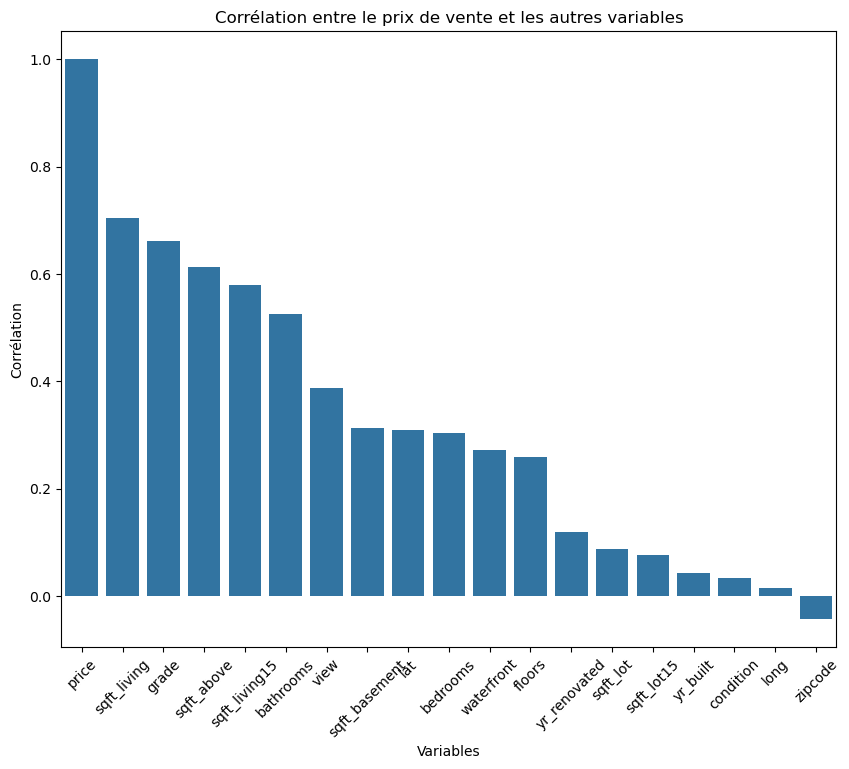

In [9]:
# Affichage de la corrélation entre price et les autres variables
plt.figure(figsize=(10, 8))
sns.barplot(x=price_correlation.index, y=price_correlation.values)
plt.title('Corrélation entre le prix de vente et les autres variables')
plt.xlabel('Variables')
plt.ylabel('Corrélation')
plt.xticks(rotation=45)
plt.show()

In [13]:
# Calcul de la matrice de corrélation
correlation_matrix = house.corr(numeric_only=True)

# Extraction de la corrélation avec la cible 'price'
price_correlation = correlation_matrix['price'].drop('price')

# Sélection des variables avec une corrélation significative
significant_correlation = price_correlation[abs(price_correlation) > 0.2]

# Affichage des variables conservées
display(significant_correlation.sort_values(ascending=False))


sqft_living      0.704557
grade            0.660685
sqft_above       0.612141
sqft_living15    0.579687
bathrooms        0.526215
view             0.388199
sqft_basement    0.313674
lat              0.308731
bedrooms         0.303073
waterfront       0.271284
floors           0.258322
Name: price, dtype: float64

In [ ]:
#Varib